## Install the necessary python libraries

In [100]:
!pip install networkx pandas numpy matplotlib scipy

import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

### 1. Centrality measurements

#### 1.1. Create a sample graph

In [101]:
graph = nx.Graph()
edges = [(0, 1), (1, 2), (0, 3), (1, 3), (0, 4), (1, 5), (4, 5), (1, 6), 
         (2, 6), (5, 6)]
graph.add_edges_from(edges)

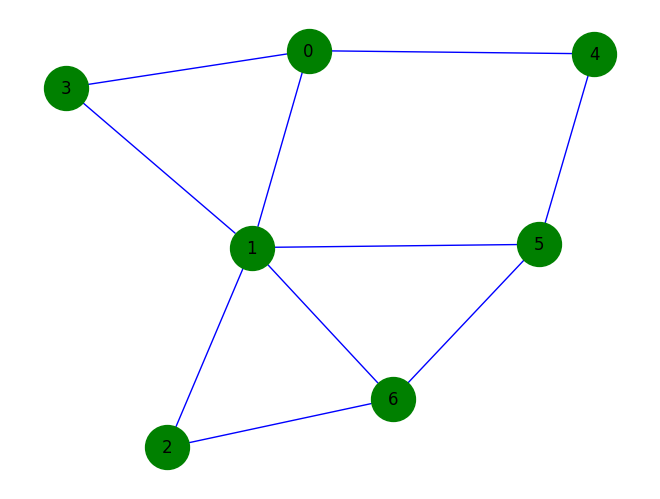

In [102]:
options = {
    'node_color': 'green',      # color of node
    'node_size': 1000,          # size of node
    'width': 1,                 # line width of edges
    'edge_color':'blue',         # edge color
}

nx.draw(graph, with_labels = True, arrows=True, **options)

#### 1.2. Degree Centrality

In [103]:
# Calculate degree centrality using networkx
degree_centrality = nx.degree_centrality(graph)
for node in sorted(degree_centrality, key=degree_centrality.get, reverse=True):
    print(f"{node}: {degree_centrality[node]}")

1: 0.8333333333333333
0: 0.5
5: 0.5
6: 0.5
2: 0.3333333333333333
3: 0.3333333333333333
4: 0.3333333333333333


In [104]:
#### Degree Centrality: Checking the code
def degree_centrality(graph):
    result = {}
    
    # Get adjacency matrix of graph
    A = nx.adjacency_matrix(graph).todense()
    
    # Number of nodes in the graph
    n = len(graph.nodes)
    
    # Calculate degree centrality
    for node in graph.nodes:
        # sum(A[node]) means the node degree
        node_degree = sum(A[node])
        # Degree centrality
        result[node] = node_degree / (n - 1)
    
    return result

degree_centrality_new = degree_centrality(graph)

for node in sorted(degree_centrality_new, key=degree_centrality_new.get, reverse=True):
    print(f"{node}: {degree_centrality_new[node]}")

1: 0.8333333333333334
0: 0.5
5: 0.5
6: 0.5
2: 0.3333333333333333
3: 0.3333333333333333
4: 0.3333333333333333


#### 1.3. Eigenvector centrality

In [105]:
# Most important people based on eigenvector centrality
eigen_centrality = nx.eigenvector_centrality(graph)
for node in sorted(eigen_centrality, key=eigen_centrality.get, reverse=True):
    print(f"{node}: {eigen_centrality[node]}")

1: 0.5640898638109806
6: 0.4065933245526306
5: 0.38866028750007753
0: 0.35269810807277485
2: 0.31204510863667356
3: 0.2947210837948928
4: 0.23832551772708074


In [106]:
# Eigenvector Centrality:
def eigenvector_centrality(graph):
    result = {}
    A = nx.adjacency_matrix(graph).todense()
    # Compute the eigenvalues and right eigenvectors of a square array (adjacency matrix).
    w,v = np.linalg.eig(A)
    
    # Index of the Maximum Absolute Eigen Value of the graph
    index = (np.abs(max(w, key=abs))).argmax()

    for node in graph.nodes:
        result[node] = abs(v[node, index])
    
    return result

eigenvector_centrality_new = eigenvector_centrality(graph)

for node in sorted(eigenvector_centrality_new, key=eigenvector_centrality_new.get, reverse=True):
    print(f"{node}: {eigenvector_centrality_new[node]}")

1: 0.5640900135766476
6: 0.4065949608169023
5: 0.3886607689076457
0: 0.35269616732991105
2: 0.31204653419512196
3: 0.29471966487233076
4: 0.2383243468860487


#### 1.4. Closeness centrality

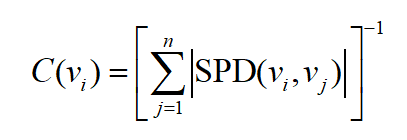

In [107]:
# Most important people based on Closeness centrality
closeness_centrality = nx.closeness_centrality(graph)
for node in sorted(closeness_centrality, key=closeness_centrality.get, reverse=True):
    print(f"{node}: {closeness_centrality[node]}")

1: 0.8571428571428571
0: 0.6666666666666666
5: 0.6666666666666666
6: 0.6666666666666666
3: 0.6
2: 0.5454545454545454
4: 0.5454545454545454


In [108]:
# Closeness Centrality:
def closeness_centrality(graph):
    result = {}
    n = len(graph.nodes)
    # Get the length of the shortest path between all pair of nodes in graph
    all_pairs_shortest_path = dict(nx.all_pairs_shortest_path_length(graph))
    print("Shortest path length: ")
    print(all_pairs_shortest_path)
    
    for node in graph.nodes:
        # Calculate closeness centrality 1/sum_length_of_all_shortest_path_to_other_nodes
        closeness_centrality = 1/sum(all_pairs_shortest_path[node].values())
        
        # Normalized betweenness centrality
        result[node] = (n - 1) * closeness_centrality
    
    return result

closeness_centrality_new = closeness_centrality(graph)
print("Closeness centrality: ")
for node in sorted(closeness_centrality_new, key=closeness_centrality_new.get, reverse=True):
    print(f"{node}: {closeness_centrality_new[node]}")

Shortest path length: 
{0: {0: 0, 1: 1, 3: 1, 4: 1, 2: 2, 5: 2, 6: 2}, 1: {1: 0, 0: 1, 2: 1, 3: 1, 5: 1, 6: 1, 4: 2}, 2: {2: 0, 1: 1, 6: 1, 0: 2, 3: 2, 5: 2, 4: 3}, 3: {3: 0, 0: 1, 1: 1, 2: 2, 4: 2, 5: 2, 6: 2}, 4: {4: 0, 0: 1, 5: 1, 1: 2, 3: 2, 6: 2, 2: 3}, 5: {5: 0, 1: 1, 4: 1, 6: 1, 0: 2, 2: 2, 3: 2}, 6: {6: 0, 1: 1, 2: 1, 5: 1, 0: 2, 3: 2, 4: 2}}
Closeness centrality: 
1: 0.8571428571428571
0: 0.6666666666666666
5: 0.6666666666666666
6: 0.6666666666666666
3: 0.6000000000000001
2: 0.5454545454545454
4: 0.5454545454545454


#### 1.5. Betweenness centrality
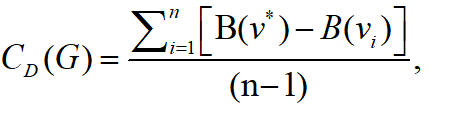

where v* is the node with highest betweenness in G

In [109]:
# Compute betweenness centrality
def betweenness_centrality(graph, normalized=True):
    betweenness = {}
    # n: number of nodes in graph
    n = len(graph.nodes)
    
    for node in graph.nodes:
        betweenness_value = 0
        for i in range(n):
            for j in range(n):
                if i != node and j != node and i < j:
                    # Find all shortest paths between 2 other nodes with i < j 
                    shortest_paths = [p for p in nx.all_shortest_paths(graph, source=i, target=j)]
                    
                    # Count the shortest paths of 2 other nodes that pass through the target node
                    count = 0
                    for shortest_path in shortest_paths:
                        if node in shortest_path:
                            count += 1
                    
                    # Calculate betweenness centrality of the target node
                    betweenness_value += count / len(shortest_paths)
                    
        # Normalized betweenness centrality or not
        if normalized:
            betweenness[node] = betweenness_value / ((n-1)*(n-2)/2)
        else:
            betweenness[node] = betweenness_value
    return betweenness

print(f"Betweenness centrality: \n{betweenness_centrality(graph, normalized=False)}")
print(f"Normalized betweenness centrality: \n{betweenness_centrality(graph)}")


Betweenness centrality: 
{0: 1.8333333333333333, 1: 6.666666666666667, 2: 0.0, 3: 0.0, 4: 0.5, 5: 2.1666666666666665, 6: 0.8333333333333333}
Normalized betweenness centrality: 
{0: 0.12222222222222222, 1: 0.4444444444444445, 2: 0.0, 3: 0.0, 4: 0.03333333333333333, 5: 0.14444444444444443, 6: 0.05555555555555555}


In [110]:
print(f"Betweenness centrality: \n{nx.betweenness_centrality(graph, normalized=False)}")
print(f"Normalized betweenness centrality: \n{nx.betweenness_centrality(graph)}")

Betweenness centrality: 
{0: 1.8333333333333333, 1: 6.666666666666666, 2: 0.0, 3: 0.0, 4: 0.5, 5: 2.1666666666666665, 6: 0.8333333333333333}
Normalized betweenness centrality: 
{0: 0.12222222222222222, 1: 0.4444444444444444, 2: 0.0, 3: 0.0, 4: 0.03333333333333333, 5: 0.14444444444444443, 6: 0.05555555555555555}


#### 1.6. Katz Centrality

In [111]:
#default value
alpha = 1
beta = 1
max_iter = 1000
tol = 1e-06
weight = None

def sigma_through_jay(j):
    # Number of shortest paths through node j
    B = A.copy()
    B[j] = np.zeros(mat_size)
    B[:,j] = np.zeros(mat_size)
    B_powers = [np.linalg.matrix_power(B,m) for m in [1,2,3,4,5]] ##[1,2,3,4,5]]
    B_sigma = np.zeros((mat_size,mat_size))
    B_min_lengths = np.zeros((mat_size,mat_size))
    for i in range(mat_size):
        for k in range(mat_size):
            if i != k:
                X = B_powers[int(min_lengths[i,k]-1)]
                B_sigma[i,k] = X[i,k]
    return (sigma - B_sigma)


In [112]:
from math import sqrt
b = dict.fromkeys(graph,float(beta))

def Katz(G, alpha=0.1, beta=1.0, max_iter=1000, tol=1.0e-6):
    nnodes = G.number_of_nodes()
    dict_v = dict([(n,0) for n in G])
    b = dict.fromkeys(G,float(beta))
    for i in range(max_iter):
        xlast = dict_v
        dict_v = dict.fromkeys(xlast, 0)
        # y^T = anfa * x^T A - b
        for n in dict_v:
            for nbr in G[n]:
                dict_v[nbr] += xlast[n] * G[n][nbr].get(weight, 1)
        for n in dict_v:
            dict_v[n] = alpha*dict_v[n] + b[n]
        err = sum([abs(dict_v[n]-xlast[n]) for n in dict_v])
        if err < nnodes*tol:
            # normalize 
            s = 1.0/sqrt(sum(v**2 for v in dict_v.values()))
            s= np.round(s,3)
            for n in dict_v:
                dict_v[n] *= s
                dict_v[n] = np.round(dict_v[n],3)
            return dict_v

A = nx.adjacency_matrix(graph)
temp = A.copy()
G_temp = nx.from_numpy_array(temp)        
Katz(G_temp)

{0: 0.379, 1: 0.449, 2: 0.348, 3: 0.348, 4: 0.341, 5: 0.382, 6: 0.383}

#### 1.7. Pagerank Centrality

In [113]:
# Converting it to a NetworkX Graph:
G_temp = nx.from_numpy_array(temp)
#nx.draw(temp_Graph)
import numpy as np
import scipy as sp
import scipy.sparse 

def mypagerank(G,alpha=0.85, max_iter=100,tol=1.0e-6):
    
    N = len(G)
    nodelist = list(G)
    A = nx.to_scipy_sparse_array(G, nodelist=nodelist, dtype=float)
    S = A.sum(axis=1)
    S[S != 0] = 1.0 / S[S != 0]
    Q = sp.sparse.csr_array(sp.sparse.spdiags(S.T, 0, *A.shape))
    A = Q @ A
    # initial vector
    x = np.repeat(1.0 / N, N)
    p = np.repeat(1.0 / N, N)
    
    dangling_weights = p
    is_dangling = np.where(S == 0)[0]
    for _ in range(max_iter):
        xlast = x
        x = alpha * (x @ A + sum(x[is_dangling]) * dangling_weights) + (1 - alpha) * p
        #l1 norm
        err = np.absolute(x - xlast).sum()
        if err < N * tol:
            return dict(zip(nodelist, map(float, np.round(x,4))))
mypagerank(G_temp)

{0: 0.1514, 1: 0.2369, 2: 0.1036, 3: 0.1046, 4: 0.1065, 5: 0.1489, 6: 0.1479}

### 2. Graph visualization

In [114]:
#Construct a graph
g = nx.Graph()
 
g.add_edge(1, 2)
g.add_edge(2, 3)
g.add_edge(3, 5)
g.add_edge(1, 4)
g.add_edge(2, 5)
g.add_edge(5, 6)
g.add_edge(5, 8)
g.add_edge(4, 8)
g.add_edge(3, 8)


#### 2.1. Circular layout

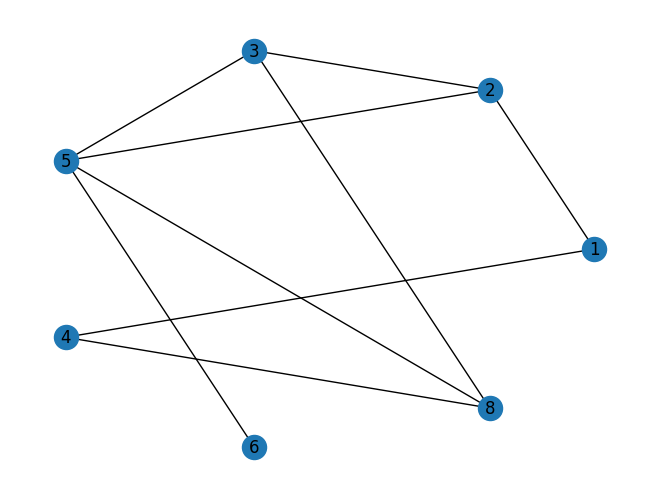

In [115]:
nx.draw_circular(g, with_labels = True)

#### 2.2. Random layout

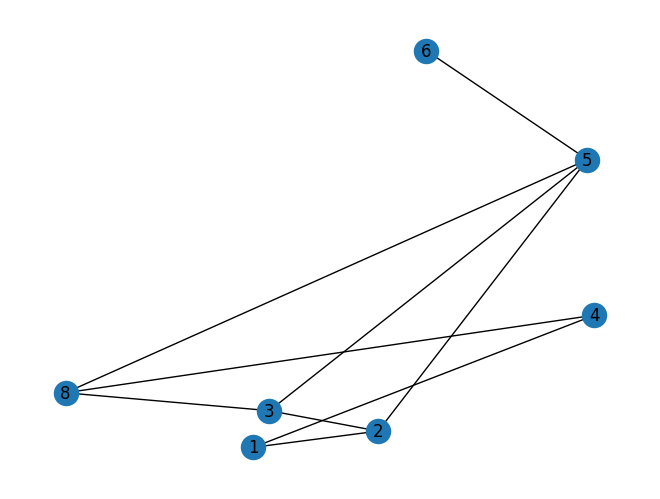

In [116]:
nx.draw_random(g, with_labels = True)

#### 2.3. Spring layout

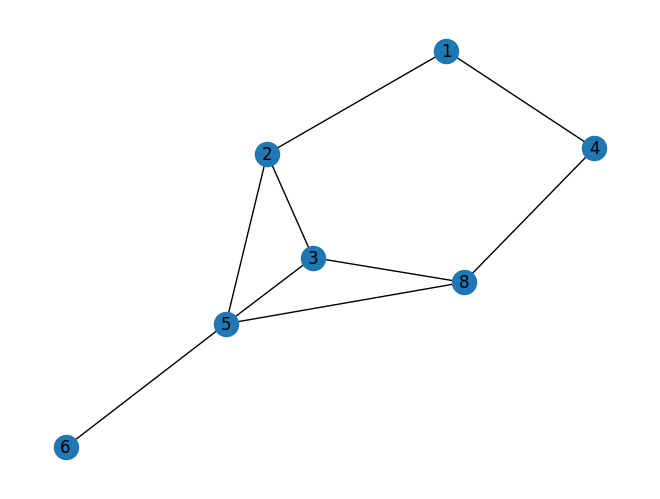

In [117]:
nx.draw_spring(g, with_labels = True)

#### 2.4. Planar layout

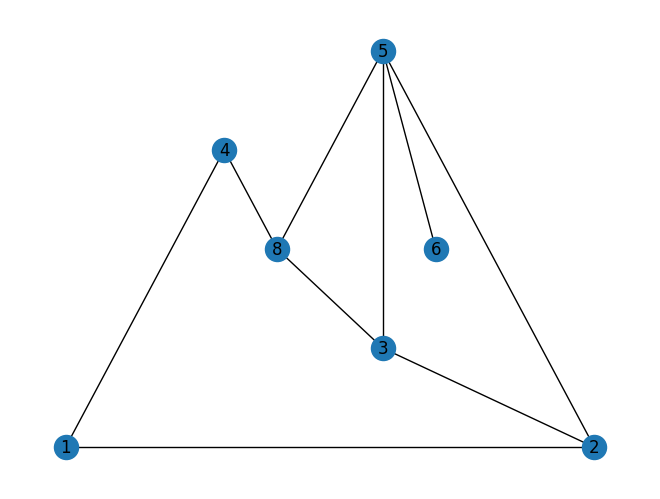

In [118]:
nx.draw_planar(g, with_labels = True)

#### 2.5. Spectral layout

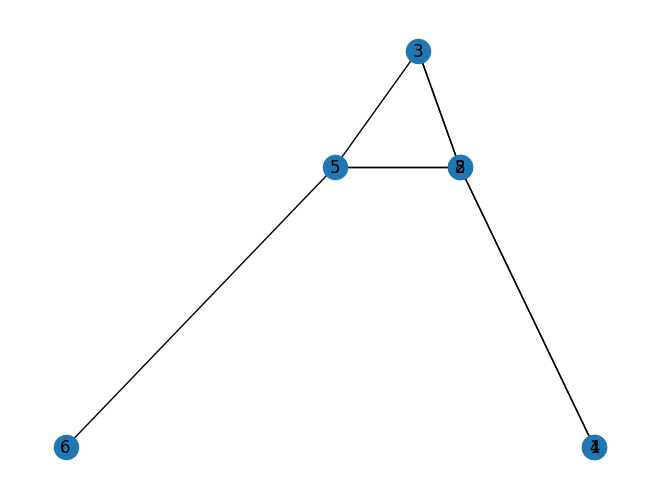

In [119]:
nx.draw_spectral(g, with_labels = True)

#### 2.6. Shell layout

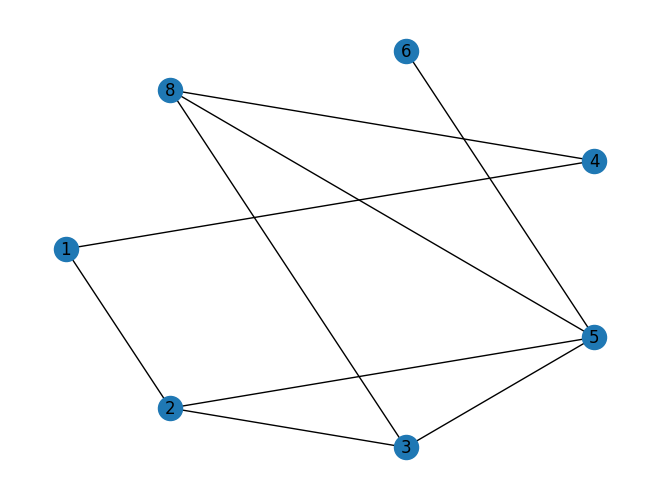

In [120]:
nx.draw_shell(g, with_labels = True)

### 3. Draw graph with centrality measurements
#### 3.1. Undirected graph

In [121]:
#draw function
def draw(G, pos, metric, title, node_size=200):
    # Customize nodes
    nodes = nx.draw_networkx_nodes(G, pos, node_size=node_size, cmap=plt.cm.plasma, 
                                   node_color=list(metric.values()),
                                   nodelist=metric.keys())
    
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.05, linscale=2, base=20))
    labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(title)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

In [122]:
G = nx.karate_club_graph()
pos = nx.spring_layout(G, seed=2000)

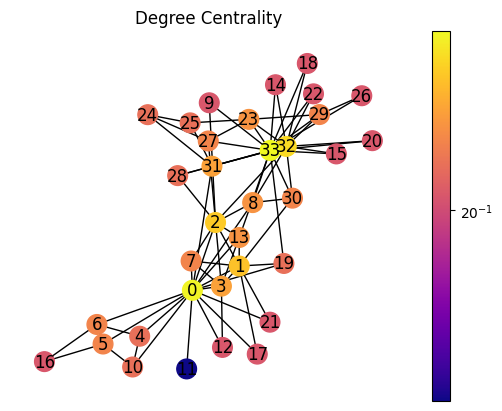

In [123]:
draw(G, pos, nx.degree_centrality(G), 'Degree Centrality')

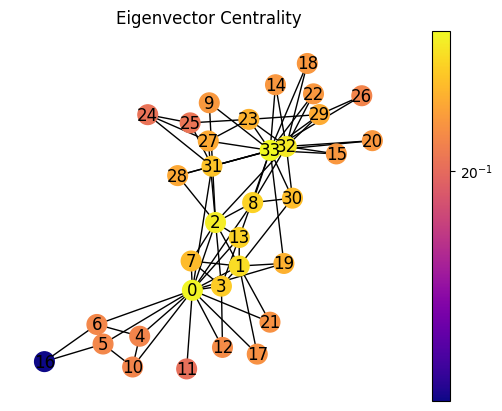

In [124]:
draw(G, pos, nx.eigenvector_centrality(G), 'Eigenvector Centrality')

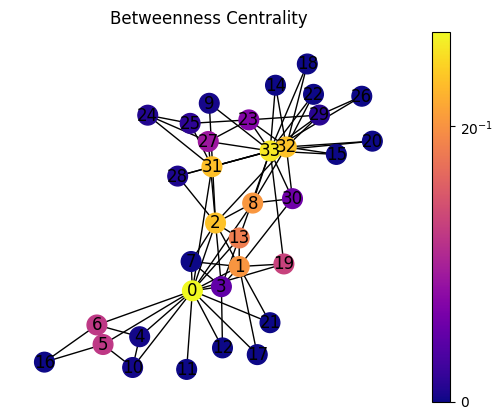

In [125]:
draw(G, pos, nx.betweenness_centrality(G), 'Betweenness Centrality')

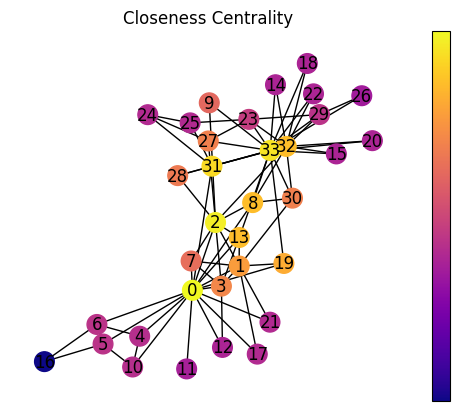

In [126]:
draw(G, pos, nx.closeness_centrality(G), 'Closeness Centrality')

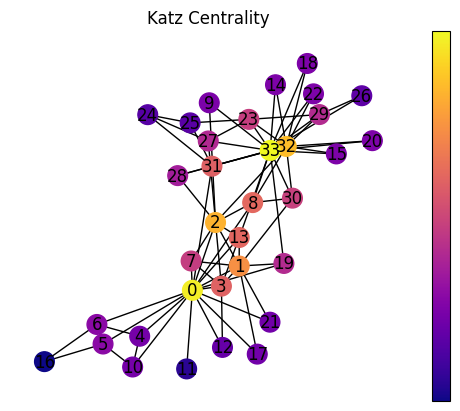

In [127]:
draw(G, pos, nx.katz_centrality(G, alpha=0.1, beta=1.0), 'Katz Centrality')

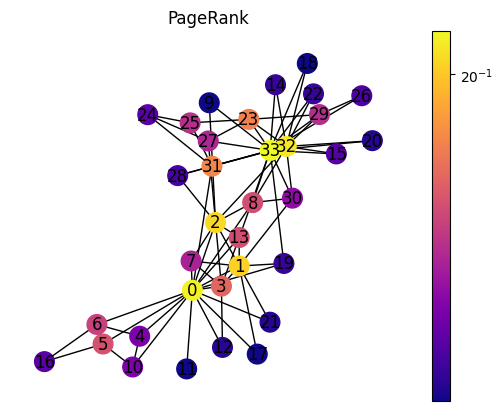

In [128]:
draw(G, pos, nx.pagerank(G, alpha=0.85), 'PageRank')

#### 3.2. Directed graph


In [129]:
directed_graph = nx.DiGraph()
directed_graph.add_edges_from([(0, 1), (1, 2), (0, 3), (1, 3), (0, 4), (1, 5), (4, 5), (1, 6), 
         (2, 6), (5, 6), (6, 7), (3, 8), (4, 8), (6, 8), (3, 9), (4, 9), 
         (1, 9), (8, 9), (2, 10), (6, 10), (7, 10), (9, 10)])
pos = nx.circular_layout(directed_graph)

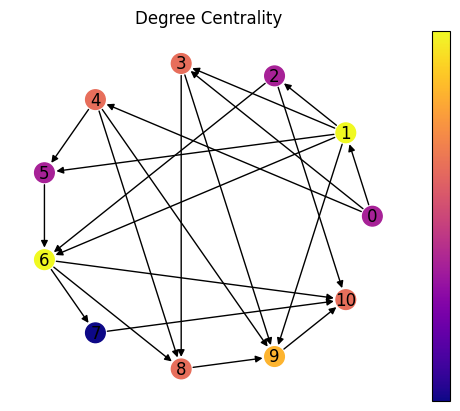

In [130]:
draw(directed_graph, pos, nx.degree_centrality(directed_graph), 'Degree Centrality')

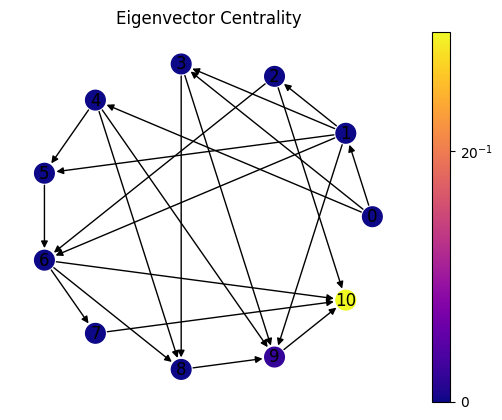

In [131]:
draw(directed_graph, pos, nx.eigenvector_centrality_numpy(directed_graph), 'Eigenvector Centrality')

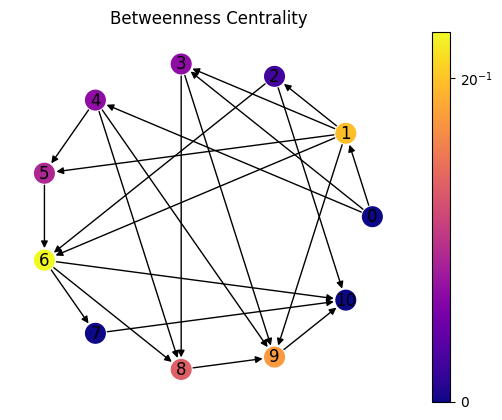

In [132]:
draw(directed_graph, pos, nx.betweenness_centrality(directed_graph), 'Betweenness Centrality')

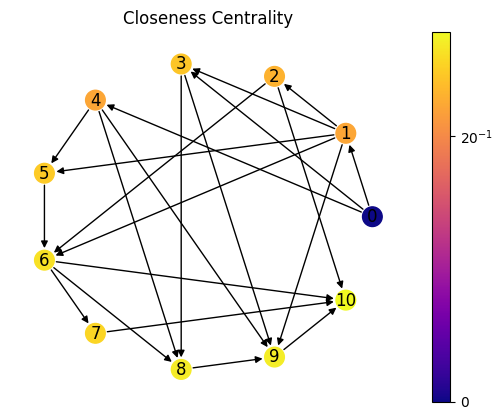

In [133]:
draw(directed_graph, pos, nx.closeness_centrality(directed_graph), 'Closeness Centrality')

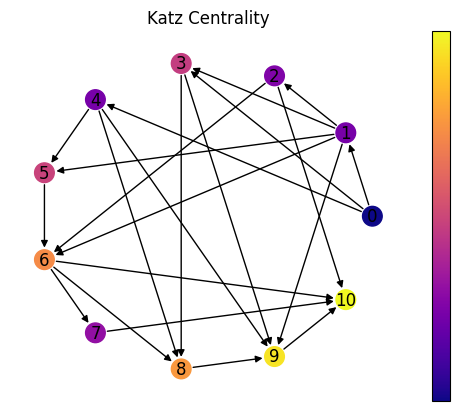

In [134]:
draw(directed_graph, pos, nx.katz_centrality(directed_graph, alpha=0.1, beta=1.0), 'Katz Centrality')

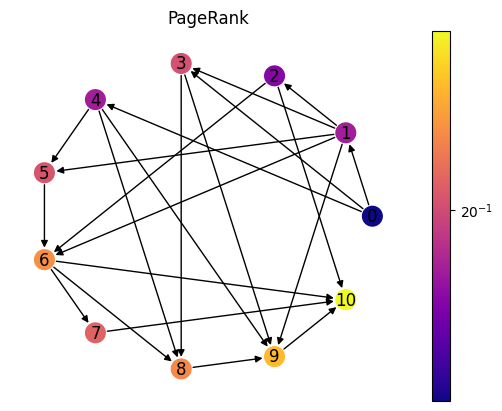

In [135]:
draw(directed_graph, pos, nx.pagerank(directed_graph, alpha=0.85), 'PageRank')

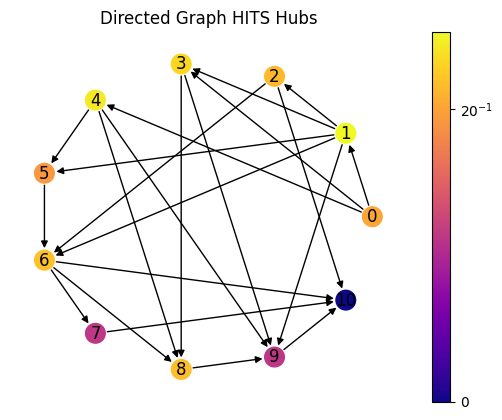

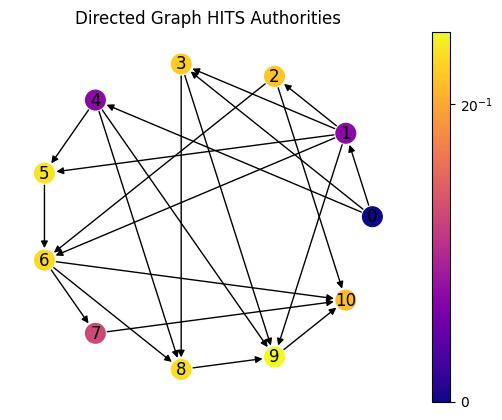

In [136]:
h,a = nx.hits(directed_graph)
draw(directed_graph, pos, h, 'Directed Graph HITS Hubs')
draw(directed_graph, pos, a, 'Directed Graph HITS Authorities')

### 4. Real world graph

#### ## Facebook social network
This dataset consists of 'circles' (or 'friends lists') from Facebook. Facebook data was collected from survey participants using this Facebook app. The dataset includes node features (profiles), circles, and ego networks.
### Load dataset

In [137]:
def load_dataset(file_path):
    data_file = open(file_path)
    edge_list = map(lambda x:tuple(map(int,x.split())),data_file.read().split("\n")[:-1])
    return edge_list

data_path = "data/facebook_combined.txt"
edge_list = load_dataset(data_path)

full_graph = nx.Graph(edge_list)

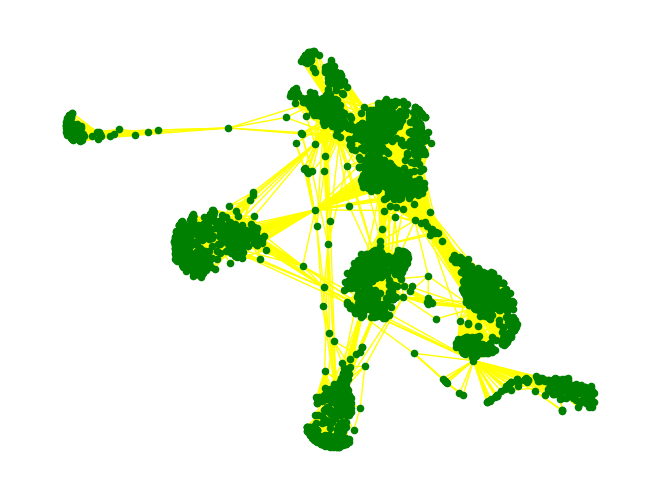

In [138]:
options = {
    'node_color': 'green',      # color of node
    'node_size': 20,            # size of node
    'width': 1,                 # line width of edges
    'edge_color':'yellow',         # edge color
}

nx.draw(full_graph, **options)

#### Checking node degree

(array([3.59e+03, 4.26e+02, 1.80e+01, 1.00e+00, 0.00e+00, 1.00e+00,
        0.00e+00, 2.00e+00, 0.00e+00, 1.00e+00]),
 array([1.000e+00, 1.054e+02, 2.098e+02, 3.142e+02, 4.186e+02, 5.230e+02,
        6.274e+02, 7.318e+02, 8.362e+02, 9.406e+02, 1.045e+03]),
 <BarContainer object of 10 artists>)

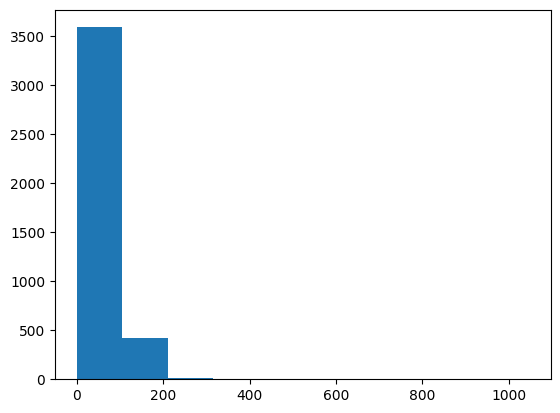

In [139]:
#Degree plot for undirected and weighted graph
degrees = [full_graph.degree(n) for n in full_graph.nodes()]

plt.hist(degrees)

#### Centrality measurement

In [140]:
# get the local cluster coefficient in dataframe format
def get_graph_centrality(graph, method):
    centrality = pd.DataFrame(sorted(method(graph).items(), 
                                 key=lambda item: -item[1]), 
    columns = ["node", "centrality score"])
    
    return centrality


#### 4.1. Degree Centrality

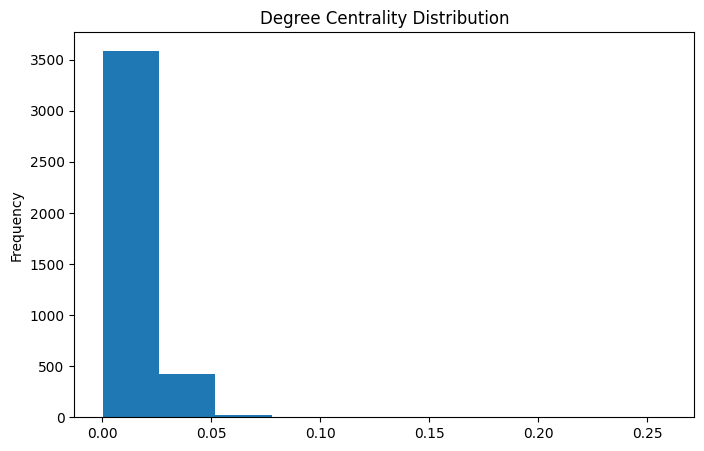

In [141]:
centrality = get_graph_centrality(full_graph, nx.degree_centrality)
centrality["centrality score"].plot.hist(figsize=(8,5), title="Degree Centrality Distribution");

#### 4.2. Eigenvector Centrality

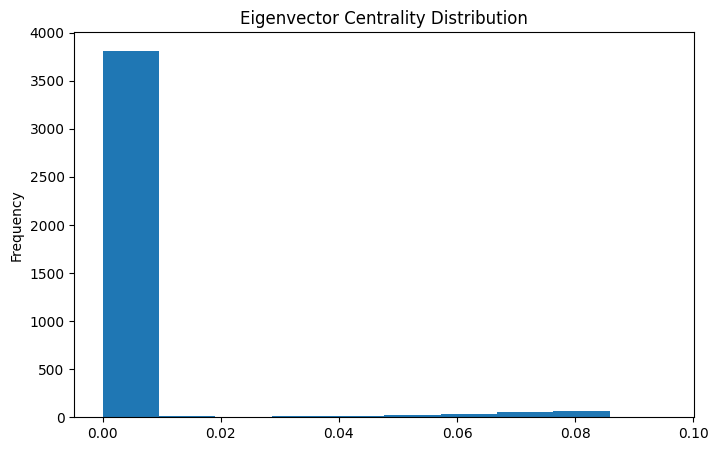

In [142]:
centrality = get_graph_centrality(full_graph, nx.eigenvector_centrality)
centrality["centrality score"].plot.hist(figsize=(8,5), title="Eigenvector Centrality Distribution");

#### 4.3. Closeness centrality

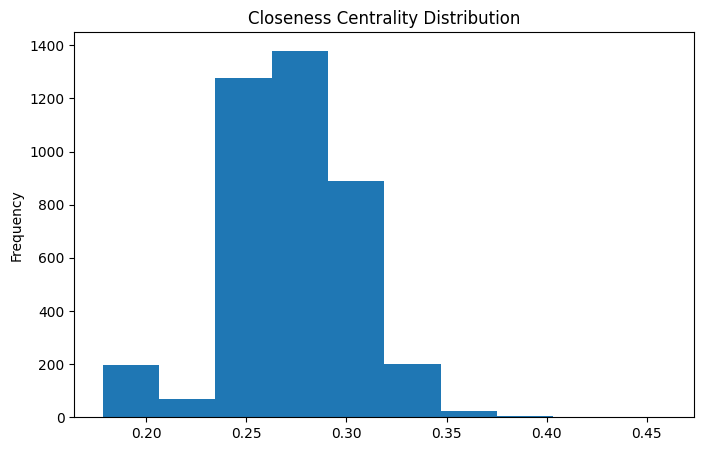

In [143]:
centrality = get_graph_centrality(full_graph, nx.closeness_centrality)
centrality["centrality score"].plot.hist(figsize=(8,5), title="Closeness Centrality Distribution");

#### 4.4. Betweenness centrality

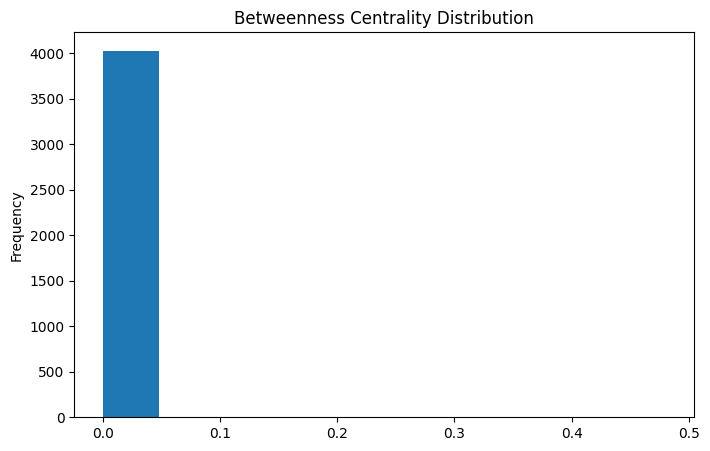

In [144]:
centrality = get_graph_centrality(full_graph, nx.betweenness_centrality)
centrality["centrality score"].plot.hist(figsize=(8,5), title="Betweenness Centrality Distribution");

#### 4.5. Visualize graph with betweenness centrality

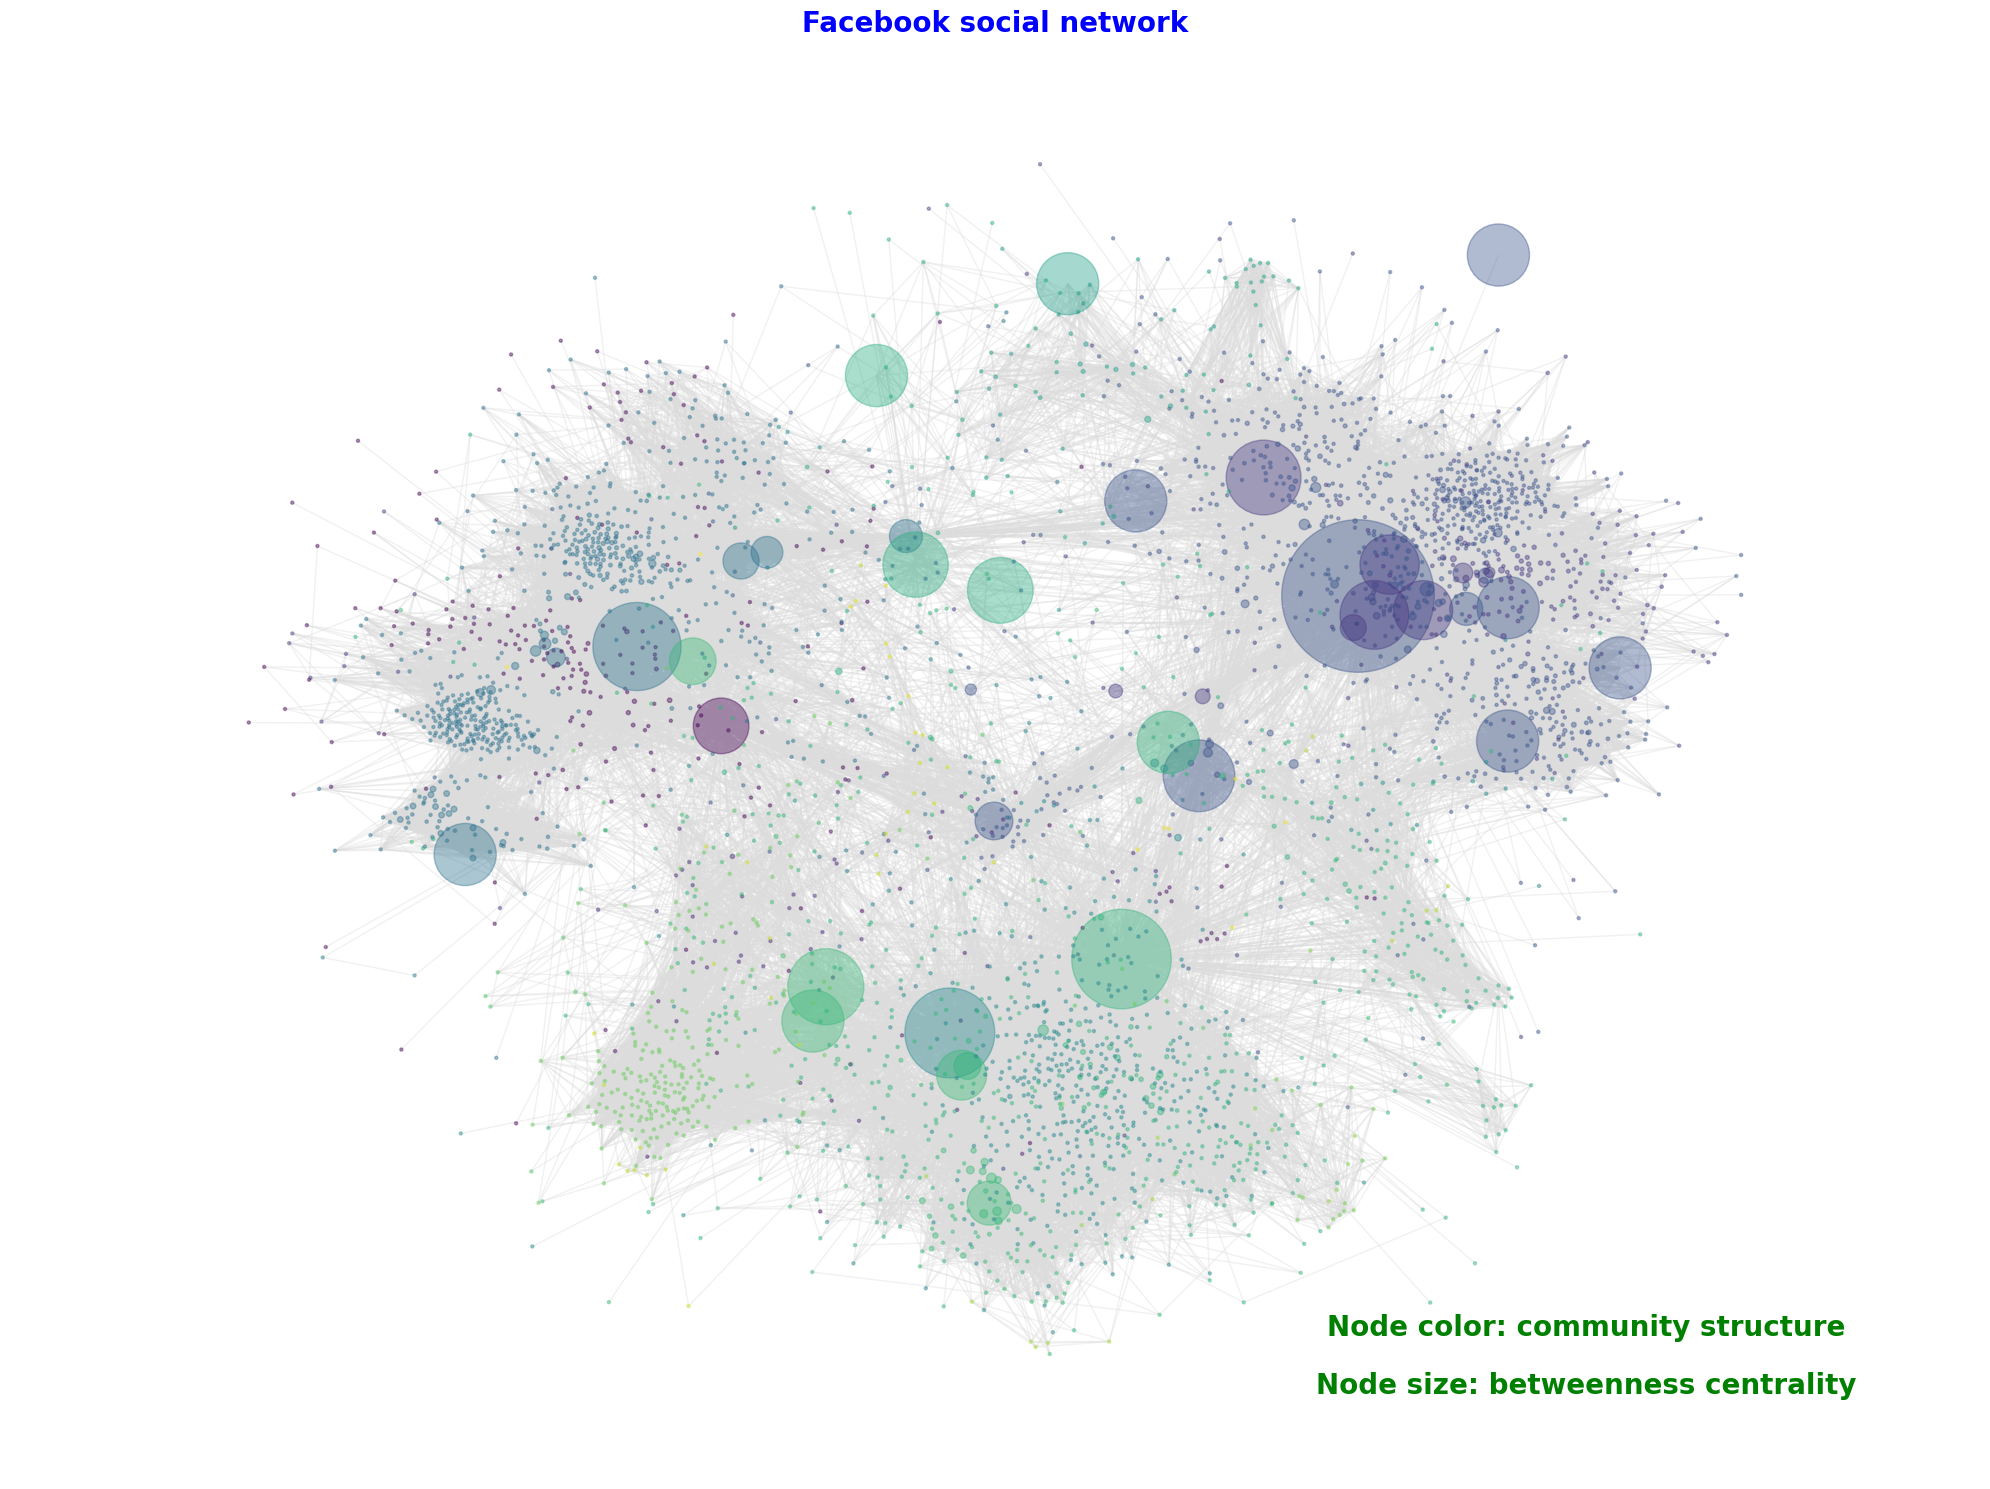

In [145]:
# largest connected component
def get_largest_component(G):
    components = nx.connected_components(G)
    largest_component = max(components, key=len)
    largest_subgraph = G.subgraph(largest_component)
    
    return largest_subgraph

def draw_graph_betweenness_centrality(G, largest_component):
    # Calculate betweenness centrality
    centrality = nx.betweenness_centrality(largest_component, k=10, endpoints=True)

    # Compute community structure
    lpc = nx.community.label_propagation_communities(largest_component)
    community_index = {n: i for i, com in enumerate(lpc) for n in com}

    # Draw graph using matplotlib
    fig, ax = plt.subplots(figsize=(20, 15))
    pos = nx.spring_layout(largest_component, k=0.15, seed=4572321)
    node_color = [community_index[n] for n in largest_component]
    node_size = [v * 20000 for v in centrality.values()]
    
    # Customize graph style
    nx.draw_networkx(
        largest_component,
        pos=pos,
        with_labels=False,
        node_color=node_color,
        node_size=node_size,
        edge_color="gainsboro",
        alpha=0.4,
    )

    # Title/legend
    font = {"color": "blue", "fontweight": "bold", "fontsize": 20}
    ax.set_title("Facebook social network", font)
    
    # Change font color for legend
    font["color"] = "green"

    ax.text(
        0.80,
        0.10,
        "Node color: community structure",
        horizontalalignment="center",
        transform=ax.transAxes,
        fontdict=font,
    )
    ax.text(
        0.80,
        0.06,
        "Node size: betweenness centrality",
        horizontalalignment="center",
        transform=ax.transAxes,
        fontdict=font,
    )

    # Resize figure for label readability
    ax.margins(0.1, 0.05)
    fig.tight_layout()
    plt.axis("off")
    plt.show()
    
# Read graph data from edgelist
largest_component = get_largest_component(full_graph)
draw_graph_betweenness_centrality(full_graph, largest_component)